## <b>Proyecto final</b>
##  <center>"Análisis de clasificación de la transparencia de copa en <html><i>Pseudotsuga menziesii</i></html> con técnicas de aprendizaje automatizado" </center>
## <b>COA-501</b> Herramientas de cómputo para investigadores (R y Python)
## <b>Alumno:</b> Iván Fermín Quiroz Ibáñez
### <b>Correo:</b> <quiroz.ivan@colpos.mx>
### <b>Github</b>: <https://github.com/IFQI91/Proyecto_final_COA501_IFQI.git>
### <b>Dat Linux</b>: <https://datlinux.com>

<img src="./Imagenes/ml.jpg"/>

In [1]:
#directorio de trabajo de binder local
getwd()

[1] "/home/jovyan"

In [2]:
#cargar base de datos
base <- read.csv("/home/jovyan/Bases/ABCPE_MIXTO_B1_R_coordenadas.csv")
base$Arbol <- as.factor(base$Arbol)
base$Bloque <- as.factor(base$Bloque)
base$Anio <- as.factor(base$Anio)
base$Muestreo <- as.factor((base$Muestreo))
base$Fungicida<- as.factor((base$Fungicida))
base$Nutrimento <- as.factor((base$Nutrimento))
base$DDA <- as.factor((base$DDA))
base$trat <- as.factor((base$trat))
base$AltRan <- as.factor((base$AltRan))

In [3]:
#Base de datos dinámica
library(DT)
datatable(base,
          class="cell border stripe",
          width="600px",filter="top",
          caption="Base de datos")

HTML widgets cannot be represented in plain text (need html)

### **0) Estudio de caso**
Se cuenta con la base de datos de un experimento realizado en Puebla, dónde se evaluaron los efectos de fertilizantes y plaguicidas contra una enfermedad foliar
conocida como tizón suizo en árboles de navidad de la especie Douglas-fir. Se tomaron
variables como transparencia de copa, severidad, incidencia, longitud de brotes, área de acículas, etc. El objetivo del análisis es determinar la mejor técnica de machine learning o aprendizaje automático (Naive Bayes, K-NN y Random Forest) para clasificar la transparencia de copa en Douglas-fir.

<img src="./Imagenes/tc.jpg"/>

**Variables:**

- Arbol= unidad experimental (UE)
- Bloque= Transparencia de copa asignada como baja,media y alta
- Longitud=  distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º) de la UE
- Latitud= distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º)
- X_UTM= coordenada X en el sistema de coordenadas universal transversal de Mercator
- Y_UTM= coordenada Y en el sistema de coordenadas universal transversal de Mercator
- Altitud= distancia vertical de la UE respecto al nivel del mar
- AltRan= Rango de Altitud de las UE en dos categorías: Alta y Baja
- Fungicida= Tratamiento fungicida (Procloraz, Propiconazol o sin fungicida)
- Nutrimento= Tratamiento fertilizante (Urea, Sulfato de potasio o sin fertilizante)
- Rep= repetición de la UE por tratamiento en un diseño experimental factorial en bloques generalizados
- Muestreo= número de muestreo de follaje (se realizaron 6)
- DDA= días despúes de la aplicación o del establecimiento del experimento
- Anio= edad del follaje o muestra
- AcicR= número de acículas retenidas de rama o muestra
- Abs= Número de cicatrices de acículas de la rama o muestra
- TotalAc= Total de acículas (AcicR + Abs)
- Inc= Incidencia del tizón suizo
- Sevmed= Severidad media del tizón suizo
- Sevmed= Severidad mínima del tizón suizo
- Sevmax= Severidad máxima del tizón suizo
- LonBrot= Longitud de la rama o muestea en centímetros
- indcol= Índice de colonización (Inc * Sevmed)
- Afmed= Área media de acícula (Área de acículas en centímetros cuadrados por muestra)
- Afmax= Área máxima de acícula por muestra
- Afmin= Área mínima de acícula por muestra
- Aftotal=  Suma de área de acículas por muestra
- CA= Abs expresada en porcentaje (Abs*100/TotalAC)
- RA= RA expresada en porcentaje (RA*100/TotalAC)
- Color= Categorías de color por cada muestra (Verde claro, verde oscuro y rojizo)
- trat= Interacción de tratamientos (Fungicida*Nutrimento)
- ABCPEIC= Área bajo la curva progreso de la enfermedad con el índice de colonización

### **1) Base de datos y AED**

     Arbol       Bloque       Longitud         Latitud          X_UTM       
 1      : 12   Alta :216   Min.   :-97.99   Min.   :19.72   Min.   :605708  
 2      : 12   Baja :216   1st Qu.:-97.99   1st Qu.:19.72   1st Qu.:605724  
 3      : 12   Media:216   Median :-97.99   Median :19.72   Median :605732  
 4      : 12               Mean   :-97.99   Mean   :19.72   Mean   :605732  
 5      : 12               3rd Qu.:-97.99   3rd Qu.:19.72   3rd Qu.:605741  
 6      : 12               Max.   :-97.99   Max.   :19.72   Max.   :605759  
 (Other):576                                                                
     Y_UTM            Altitud      AltRan    Fungicida Nutrimento      Rep     
 Min.   :2180985   Min.   :2973   Alta:312   1:216     1:216      Min.   :1.0  
 1st Qu.:2181009   1st Qu.:2979   Baja:336   2:216     2:216      1st Qu.:1.0  
 Median :2181025   Median :2982              3:216     3:216      Median :1.5  
 Mean   :2181027   Mean   :2985                                 

[1] "data.frame"

'data.frame':	648 obs. of  32 variables:
 $ Arbol     : Factor w/ 54 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Bloque    : Factor w/ 3 levels "Alta","Baja",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Longitud  : num  -98 -98 -98 -98 -98 ...
 $ Latitud   : num  19.7 19.7 19.7 19.7 19.7 ...
 $ X_UTM     : num  605748 605744 605740 605754 605742 ...
 $ Y_UTM     : num  2181070 2181057 2181039 2181034 2181026 ...
 $ Altitud   : num  2979 2979 2980 2980 2984 ...
 $ AltRan    : Factor w/ 2 levels "Alta","Baja": 2 2 2 2 2 1 1 1 1 1 ...
 $ Fungicida : Factor w/ 3 levels "1","2","3": 1 1 2 1 2 1 1 2 2 3 ...
 $ Nutrimento: Factor w/ 3 levels "1","2","3": 1 2 2 2 1 3 3 3 2 1 ...
 $ Rep       : int  1 1 1 2 1 1 2 1 2 1 ...
 $ Muestreo  : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ DDA       : Factor w/ 6 levels "0","63","91",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Anio      : Factor w/ 2 levels "2016","2017": 1 1 1 1 1 1 1 1 1 1 ...
 $ AcicR     : int  74 129 69 33 98 71 68 44 92 92 .

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



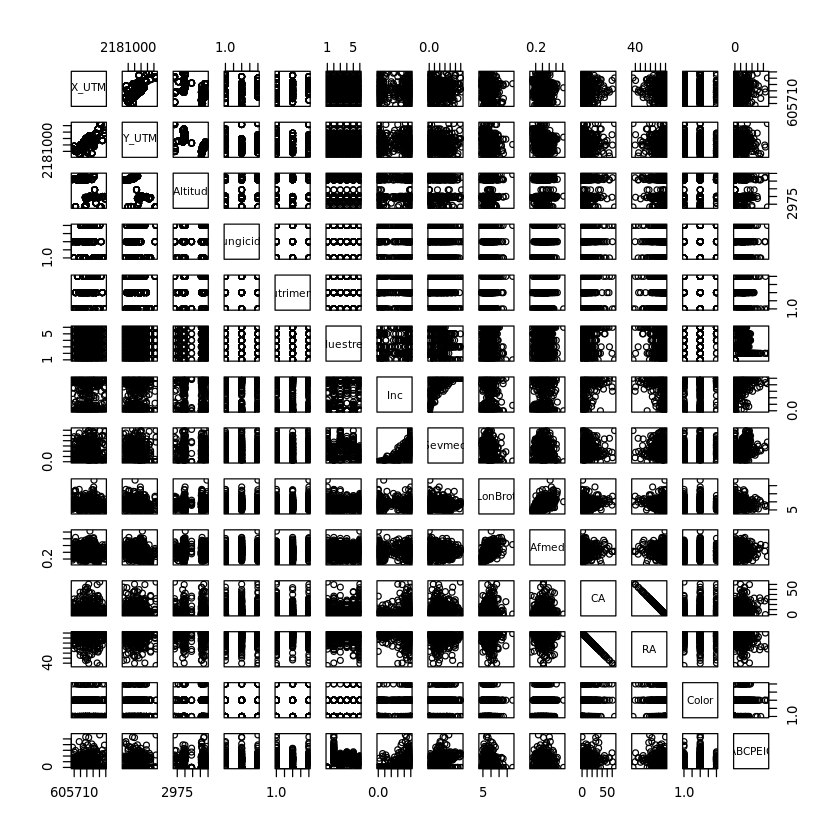


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




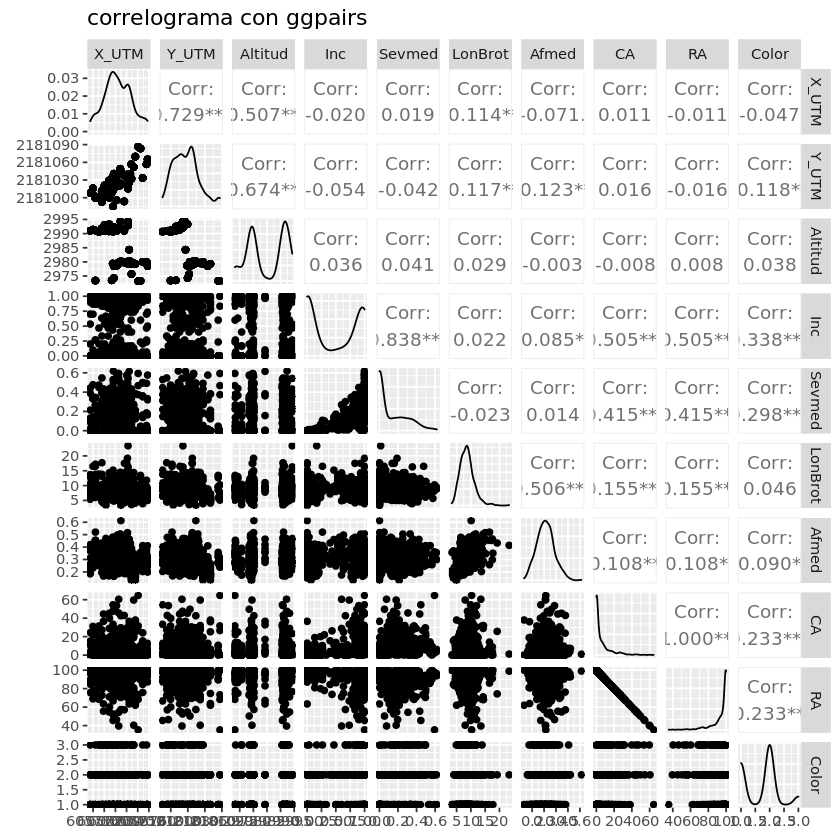

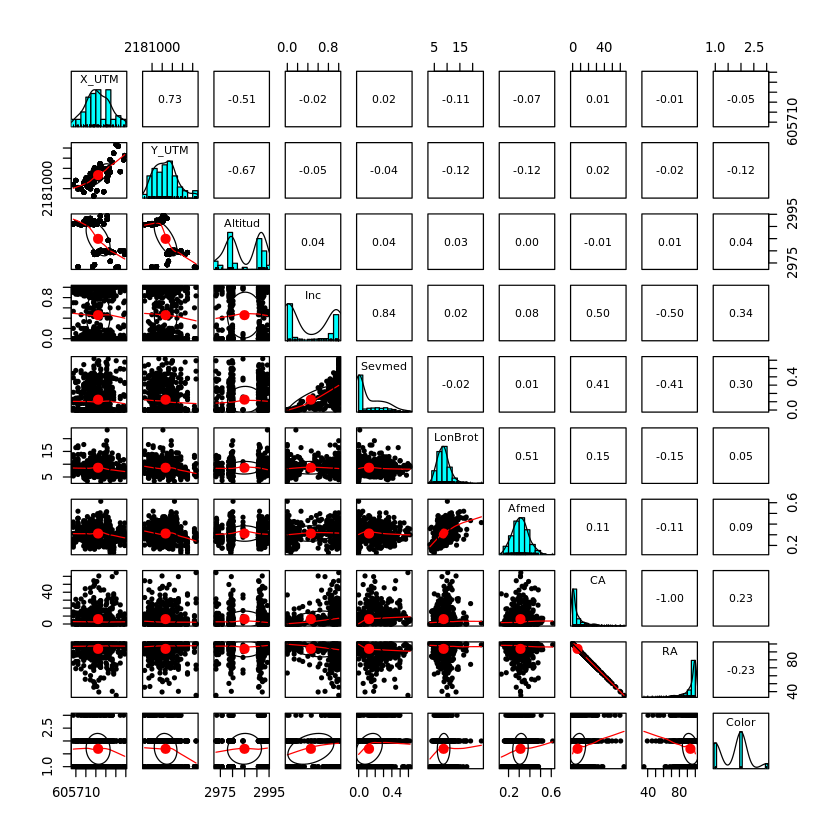

In [4]:
options(warn=-1)
#base de datos
summary(base)
class(base)
str(base)

#matriz de diagramas de dispersion
pairs(base[,c(5,6,7,9,10,12,18,19,22,24,28:30,32)])

library(ggplot2)
library(GGally)
ggpairs(base[,c(5,6,7,18,19,22,24,28:30)], 
        title="correlograma con ggpairs") 

library(psych)
psych::pairs.panels(base[,c(5,6,7,18,19,22,24,28:30)])

In [ ]:
summary(base$Altitud)
2994-2973

In [ ]:
#Análisis de componentes principales 
base.pc<- na.omit(base[,c(14,2,5,6,7,8,18,19,22,24,28:30)])
pca <- prcomp(base.pc[,-c(1,2,6)], scale = T, center=T)
summary(pca)

#biplot
library(ggplot2)
Edad <- as.factor(base.pc$Anio)
ggplot(base.pc, aes(x = pca$x[,1], y = pca$x[,2], colour = Edad)) +
  geom_point(size=3) + xlab("PC1") + ylab("PC2")+
  ggtitle("PCA por Edad del follaje")

#biplot2
library(ggplot2)
ggplot(base.pc, aes(x = pca$x[,1], y = pca$x[,2], colour = Altitud)) +
  geom_point(size=3) + xlab("PC1") + ylab("PC2")+
  ggtitle("PCA por rango de altitud (2994-2973 msnm)")

#biplot3
library(ggplot2)
Alt <- as.factor(base.pc$AltRan)
ggplot(base.pc, aes(x = pca$x[,1], y = pca$x[,2], colour = Alt)) +
  geom_point(size=3) + xlab("PC1") + ylab("PC2")+
  ggtitle("PCA por AltRan")

In [ ]:
plot(pca,main="Sedimentación")
biplot(pca, main="PCA biplot")

colores <- function(vec){
  # la funci?n rainbow() devuelve un vector que contiene el n?mero de colores distintos
  col <- rainbow(length(unique(vec)))
  return(col[as.numeric(as.factor(vec))])
}

plot(pca$x[,c(1, 2)], col = colores(base$Bloque),
     pch = 19, 
     xlab = "PC1", 
     ylab = "PC2", main="PCA por Transparencia")

In [ ]:
#PCA-Biplot con variables categoricas en ggplot2 y ggfortify
library(ggfortify)
library(ggplot2)
pca_res <- pca

#Grafica Biplot, Centroides, vectores, factores 

autoplot(pca_res, data = base.pc, colour ='Bloque', scale=0,
           loadings = TRUE, loadings.colour = 'black',
           loadings.label= TRUE, loadings.label.repel=TRUE, loadings.label.size = 3.5,
           loadings.label.colour="blue",
           loadings.label.vjust = 1.3,loadings.label.hjust=0)+
  theme()+labs(colour = "Transparencia de copa",shape="Age")+
  theme(axis.title = element_text(family = "Arial", face="bold", size=10.5))+
  theme(legend.position = "right",legend.box = "vertical")+
  theme(legend.title = element_text(colour="black", size=10.5, 
                                    face="bold"),
        plot.background = element_rect(fill = "white"))+
  guides(color=guide_legend(override.aes=list(shape=15,size=5)),
         shape=guide_legend(override.aes=list(size=5)))+
  theme(legend.key=element_blank())+
  scale_x_continuous("PC1 (30.45%)")+scale_y_continuous("PC2 (23.09%)")

**Interpretación:** De acuerdo con el AED y ACP se seleccionaron las variables transparencia de copa, coordenadas UTM (X y Y), altitud, incidencia, severidad, longitud de brote, área de acícula, acículas caidas, acículas retenidas y color de acícula, para implementar las técnicas de ML.


### **2) Random Forest**

In [ ]:
options(warn=-1)
library(randomForest)
library(caret)

#Getting Data
base_rf <- na.omit(base[,c(2,5,6,7,18,19,22,24,28:30)])

base_rf$Bloque <- as.factor(base_rf$Bloque)
table(base_rf$Bloque)

#Data Partition
set.seed(123)
ind <- sample(2, nrow(base_rf), replace = TRUE, prob = c(0.7, 0.3))
train <- base_rf[ind==1,]
test <- base_rf[ind==2,]

#Random Forest in R
rf <- randomForest(Bloque~., data=train, proximity=TRUE) 
rf

#Confusion Matrix and Statistics
p1 <- predict(rf, train)
confusionMatrix(p1, train$Bloque)
(tab1 <- table(p1, train$Bloque))
1 - sum(diag(tab1)) / sum(tab1)
#error del 0%


p2 <- predict(rf, test)
confusionMatrix(p2, test$Bloque)
(tab2 <- table(p2, test$Bloque))
1 - sum(diag(tab2)) / sum(tab2)
#error del 0%



#Error rate of Random Forest
plot(rf)

#Tune mtry (Número de variables aleatorias utilizadas en cada árbol)
t <- tuneRF(train[,-1], train[,1],
            stepFactor = 0.5,
            plot = TRUE,
            ntreeTry = 5,
            trace = TRUE,
            improve = 0.05)
#mtry=6

#No. of nodes for the trees
hist(treesize(rf),
     main = "No. of Nodes for the Trees",
     col = "blue")
#media de 60 árboles

#Variable Importance
varImpPlot(rf,
           sort = T,
           n.var = 10,
           main = "Top 10 - Importancia de Variables")
importance(rf)

#Partial Dependence Plot
partialPlot(rf, train, Y_UTM, "Alta")

**Interpretación:** se obtuvo una precisión del 98% y un valor $\kappa$= 0.98, una
mtry (Número de variables aleatorias utilizadas en cada árbol) de 6, 60 nodos promedio por árbol, las variables de mayor peso son las coordenadas UTM (X y Y).

### **3) Naive Bayes**


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





 Alta  Baja Media 
  200   216   208 

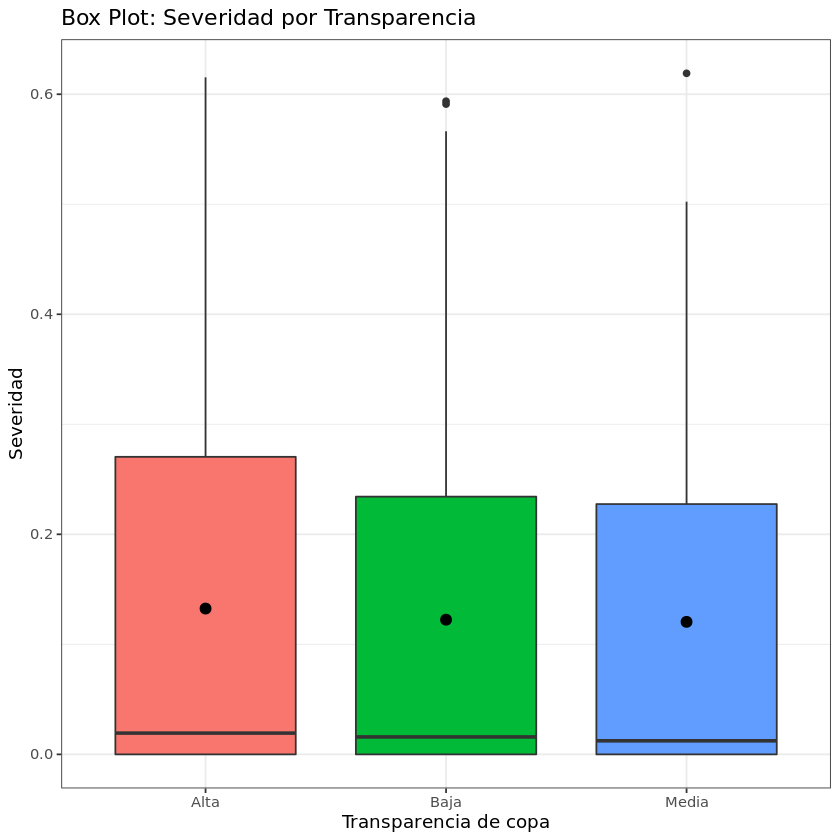

In [5]:
options(warn=-1)
#clasificacion en datos poco correlacionados
#https://www.r-bloggers.com/2021/04/naive-bayes-classification-in-r/
#Para segmentar imagenes (severidad)
#https://plantcv.readthedocs.io/en/latest/tutorials/machine_learning_tutorial/

library(dplyr)
library(ggplot2)


base_nb <- na.omit(base[,c(2,5,6,7,18,19,22,24,28:30)])

#Dplyr
base_nb$Bloque <- as.factor(base_nb$Bloque)
table(base_nb$Bloque)

base_nb %>%
  ggplot(aes(x=base_nb$Bloque,
  y=base_nb$Sevmed, fill = base_nb$Bloque)) +
  geom_boxplot() +theme_bw()+stat_summary(fun="mean")+
  ggtitle("Box Plot: Severidad por Transparencia")+
  xlab("Transparencia de copa") + ylab("Severidad")+
  theme(legend.position="none")


In [7]:
library(naivebayes)
library(lattice)
#particion de datos
set.seed(1234)
ind <- sample(2, nrow(base_nb), replace = T, prob = c(0.7, 0.3))
train_nb <- base_nb[ind == 1,]
test_nb <- base_nb[ind == 2,]

nb <- naive_bayes(Bloque ~ ., data = train_nb, usekernel = T)

#Prediccion
p <- predict(nb, train_nb, type = 'prob')
head(cbind(p, train_nb))

#Confusion Matrix – train data
p1 <- predict(nb, train_nb)
(tab1 <- table(p1, train_nb$Bloque))

1 - sum(diag(tab1)) / sum(tab1) #error del 35%

#Confusion Matrix – test data
p2 <- predict(nb, test_nb)
(tab2 <- table(p2, test_nb$Bloque))
p2

1 - sum(diag(tab2)) / sum(tab2) #error del 51%

library(caret)
confusionMatrix(p2,test_nb$Bloque)

,Alta,Baja,Media,Bloque,X_UTM,Y_UTM,Altitud,Inc,Sevmed,LonBrot,Afmed,CA,RA,Color
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.9787447,0.01850964,0.002745704,Alta,605747.9,2181070,2979.3,0.9000000,0.1503333,7.25,0.2393667,25.252525,74.74747,1
2,0.4113505,0.53406359,0.054585864,Alta,605744.3,2181057,2979.3,1.0000000,0.3310000,12.90,0.3744867,1.526718,98.47328,1
3,0.6491587,0.25629479,0.094546554,Alta,605740.2,2181039,2979.5,0.7666667,0.3466667,5.10,0.1960667,2.816901,97.18310,1
4,0.8842636,0.11442525,0.001311104,Alta,605754.5,2181034,2980.0,1.0000000,0.3510000,3.90,0.3699000,15.384615,84.61538,1
6,0.8065772,0.14937314,0.044049685,Alta,605727.7,2181021,2992.3,1.0000000,0.2486667,5.00,0.2253667,17.441860,82.55814,1
7,0.7160262,0.07648249,0.207491317,Alta,605724.3,2181003,2990.8,1.0000000,0.4033333,6.80,0.2549333,4.225352,95.77465,1


       
p1      Alta Baja Media
  Alta    91   19    20
  Baja    19   97    26
  Media   33   37    92

[1] 0.3548387

       
p2      Alta Baja Media
  Alta    28   14    13
  Baja    12   30    22
  Media   17   19    35

[1] Baja  Baja  Alta  Baja  Media Media Baja  Media Alta  Alta  Baja  Alta 
 [13] Media Alta  Media Baja  Media Media Media Media Baja  Media Baja  Baja 
 [25] Baja  Baja  Alta  Media Baja  Alta  Alta  Baja  Alta  Alta  Media Baja 
 [37] Baja  Baja  Baja  Baja  Media Alta  Media Alta  Media Alta  Media Media
 [49] Media Media Media Alta  Media Alta  Baja  Baja  Media Alta  Baja  Media
 [61] Alta  Baja  Media Alta  Media Media Baja  Media Media Alta  Alta  Baja 
 [73] Baja  Alta  Media Baja  Media Baja  Alta  Alta  Media Media Media Alta 
 [85] Media Media Baja  Media Alta  Baja  Baja  Media Media Alta  Baja  Baja 
 [97] Baja  Media Media Media Alta  Alta  Baja  Baja  Media Alta  Media Alta 
[109] Baja  Media Alta  Alta  Alta  Media Media Alta  Media Alta  Alta  Baja 
[121] Media Baja  Media Media Alta  Alta  Media Alta  Alta  Media Baja  Baja 
[133] Baja  Baja  Baja  Media Media Baja  Media Baja  Baja  Alta  Media Media
[145] Alta  Alta  Baja  Media Media Media Alta  Alta  Baja  Alta  Baja  Media
[157] Alta  Alta  Media Alta  Alta  Alta  Media Baja  Baja  Baja  Baja  Media
[169] Baja  Media Baja  Baja  Baja  Baja  Baja  Baja  Alta  Baja  Alta  Media
[181] Alta  Alta  Media Media Media Baja  Baja  Media Baja  Media
Levels: Alta Baja Media

[1] 0.5105263

Confusion Matrix and Statistics

          Reference
Prediction Alta Baja Media
     Alta    28   14    13
     Baja    12   30    22
     Media   17   19    35

Overall Statistics
                                          
               Accuracy : 0.4895          
                 95% CI : (0.4164, 0.5629)
    No Information Rate : 0.3684          
    P-Value [Acc > NIR] : 0.0004302       
                                          
                  Kappa : 0.2309          
                                          
 Mcnemar's Test P-Value : 0.8238127       

Statistics by Class:

                     Class: Alta Class: Baja Class: Media
Sensitivity               0.4912      0.4762       0.5000
Specificity               0.7970      0.7323       0.7000
Pos Pred Value            0.5091      0.4688       0.4930
Neg Pred Value            0.7852      0.7381       0.7059
Prevalence                0.3000      0.3316       0.3684
Detection Rate            0.1474      0.1579       0.1842
Det

**Interpretación:** se obtuvo una precisión de 49% y un valor de $\kappa$=0.23.
En general esta técnica no fue tan buena para clasificar la transparencia de copa.


### **4) K-NN**

In [ ]:
#https://rpubs.com/JairoAyala/601703

options(warn=-1)
library(kknn)

base_knn <- na.omit(base[,c(2,5,6,7,9,10,12,18,19,22,24,28:30,32)])

base_knn$Bloque <- as.factor(base_knn$Bloque)
table(base_knn$Bloque)


set.seed(2020)
muestra <- sample(1:624, 437)
train_knn <- base_knn[muestra,]#70%
test_knn<- base_knn[-muestra,]#30%
dim(train_knn)[1]
dim(test_knn)[1]

knn <- train.kknn(Bloque~ ., data = train_knn, kmax = 9)
knn

entre <- predict(knn, train_knn[,-1])
tt  <- table(train_knn[,1],entre)
tt

precision <- (sum(diag(tt)))/sum(tt)
precision

#precisión del 100 % en datos de entrenamiento


#Precisión test de prueba
pred    <- predict(knn, test_knn[,-1])
table   <- table(test_knn[,1],pred)
table


clas    <- (sum(diag(table)))/sum(table)
clas

#Precisión del 53% de datos de prueba

#matriz de confusion con la prueba

library(caret)
confusionMatrix(pred,test_knn$Bloque)

**Interpretación:** se obtuvo una precisión de 53% y un valor de $\kappa$=0.30.
En general esta técnica no fue tan buena para clasificar la transparencia de copa.

### **5) Curvas Receiver Operating Characteristic (ROC)**

In [ ]:
#Random forest
# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- stats::predict(rf,test[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test$Bloque <- as.factor(test$Bloque)
classes <- levels(test$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve-Random Forest",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve- Random Forest",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}


#Naive Bayes (ROC)

# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- stats::predict(nb,test_nb[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test_nb$Bloque <- as.factor(test_nb$Bloque)
classes <- levels(test_nb$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test_nb[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve-Naive Bayes",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve-Naive Bayes",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf <- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}


#KNN (ROC)

# Validation set assessment #2: ROC curves and AUC
# Needs to import ROCR package for ROC curve plotting:
library(ROCR)
# Calculate the probability of new observations belonging to each class
# prediction_for_roc_curve will be a matrix with dimensions data_set_size x number_of_classes
prediction_for_roc_curve <- stats::predict(knn,test_knn[,-1],type="prob")
# Use pretty colours:
pretty_colours <- c("#F8766D","#00BA38","#619CFF")
# Specify the different classes 
test_knn$Bloque <- as.factor(test_knn$Bloque)
classes <- levels(test_knn$Bloque)
# For each class
for (i in 1:3)
{
  # Define which observations belong to class[i]
  true_values <- ifelse(test_knn[,1]==classes[i],1,0)
  # Assess the performance of classifier for class[i]
  pred <- prediction(prediction_for_roc_curve[,i],true_values)
  perf <- performance(pred, "tpr", "fpr")
  if (i==1)
  {
    plot(perf,main="ROC Curve - KNN",col=pretty_colours[i]) 
  }
  else
  {
    plot(perf,main="ROC Curve -KNN",col=pretty_colours[i],add=TRUE)
    abline (a = 0, b = 1, lty="dotted", lwd=2) 
  }
  # Calculate the AUC and print it to screen
  auc.perf<- performance(pred, measure = "auc")
  print(auc.perf@y.values)
}

**Interpretación:** De acuerdo la evaluación de las curvas ROC, es evidente qu el mejor modelo para clasificar a la transparencia de copa de Douglas-fir fue Random Forest, ya que tuvo mayor cantidad de positivos verdaderos en comparación con Naive Bayes y K-NN, donde se pueden considerar que son modelos de regulares a malos.


### **6) Comparación de métricas para validación**

In [ ]:
p <-rbind(c(0.98,0.49,0.53)) 
k <- rbind(c(0.98,0.23,0.30))
r <- rbind(c(1.00, 0.70, 0.72))
pres <- rbind(p,k,r)
pres <- as.data.frame(pres)
colnames(pres) <- c("Random Forest","Naive Bayes", "K-NN")
pres <- cbind(Métrica=c("Precisión(%)","Kappa", "AUC-ROC"),pres)
pres

### **7) Conclusiones**

De acuerdo la evaluación de las curvas ROC, precisión y valor de kappa, es evidente que el mejor modelo para clasificar a la transparencia de copa de Douglas-fir fue Random Forest, además tuvo mayor cantidad de positivos verdaderos con sensibilidad, especificidad y precisión equilibrada en comparación de Naive Bayes y K-NN, donde se pueden considerar que son modelos de regulares a malos para clasificar la transparencia de copa.

## **Bibliografía**

- finnstats. Naive Bayes Classification in R | R-Bloggers. 9 de abril de 2021, https://www.r-bloggers.com/2021/04/naive-bayes-classification-in-r/

- finnstats. Random Forest in R | R-Bloggers. 13 de abril de 2021, https://www.r-bloggers.com/2021/04/random-forest-in-r/

- Gandhi, Rohith. Naive Bayes Classifier. Medium, 17 de mayo de 2018, https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c  

- K-NN Classifier in R Programming». GeeksforGeeks, 18 de junio de 2020, https://www.geeksforgeeks.org/k-nn-classifier-in-r-programming/ 

- Naive Bayes Classifier in R Programming. GeeksforGeeks, 18 de junio de 2020, https://www.geeksforgeeks.org/naive-bayes-classifier-in-r-programming/ 

- Quiroz, I. I. F. 2019. Tolerancia al tizón suizo en una plantación de árboles de navidad en Aquixtla, Puebla. Tesis de Maestría. Programa en Ciencias Forestales. Colegio de Postgraduados. 101 p http://colposdigital.colpos.mx:8080/jspui/handle/10521/3571

- RPubs - KNN. https://rpubs.com/JairoAyala/601703. Accedido 20 de noviembre de 2022
